In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
from metrics.charts import TrainingCharts, TestCharts
from datasets.xor import XOR
from experiment.runExperiment import RunExperiment
from experiment.models import ModelSetups
from training.train import TrainUtil

In [3]:
dataset = XOR()
in_features = 2
out_features = 2
X_train, y_train, X_val, y_val = dataset.get_dataset(in_features = in_features, unique = False)
trainUtil = TrainUtil(X_train, y_train, X_val = X_val, y_val = y_val)

In [4]:
# Width, depth and which layers the sparsity is applied to -> Try with a binary search on these 
# Similar number of parameters
# Where does the sparsity help? -> check combinations

In [5]:
layers = 3
model_params_all = {"l1": (200, 15), "l2": (250, 20), "l3": (200, 10)}
model_params_first = {"l1": (200, 15), "l2": (250, None), "l3": (200, None)}
model_params_second = {"l1": (200, None), "l2": (250, 20), "l3": (200, None)}
model_params_third = {"l1": (200, None), "l2": (250, None), "l3": (200, 10)}
model_params_first_second = {"l1": (200, 15), "l2": (250, 20), "l3": (200, None)}
model_params_first_third = {"l1": (200, 15), "l2": (250, None), "l3": (200, 10)}
model_params_second_third = {"l1": (200, None), "l2": (250, 20), "l3": (200, 10)}

In [6]:
experiment = RunExperiment(trainUtil, in_features)
modelSetups = ModelSetups()

In [7]:
trainUtil.set_data_granularity(1)

In [ ]:
model_types = {"Complete Sparse model": model_params_all, 
               "1st L Sparse": model_params_first, 
               "2nd L Sparse": model_params_second,
               "3rd L Sparse": model_params_third,
               "1st and 2nd L Sparse": model_params_first_second,
               "1st and 3rd L Sparse": model_params_first_third,
               "2nd and 3rd L Sparse": model_params_second_third
            }
chartUtils = {}
chartUtils["all"] = experiment.perform_one_experiment(
    models = 
    {
        "Control Model": modelSetups._get_control_model,
        "Dense Model": modelSetups._get_dense_model,
    },
    in_features = in_features, 
    out_features = out_features, 
    layers = layers,  
    model_params = model_types["Complete Sparse model"]
)

for modelName in model_types:
    chartUtils[modelName] = experiment.perform_one_experiment(
        models = {
            modelName: modelSetups._get_sparse_model,
            modelName + " Ortho": modelSetups._get_sparse_model
            },
        in_features = in_features, 
        out_features = out_features, 
        layers = layers, 
        model_params = model_types[modelName]
        )

In [9]:
model_keys = list(chartUtils.keys())
combined_charts = chartUtils[model_keys[0]]

for key in model_keys[1:]:
    combined_charts = combined_charts.combine_charts(chartUtils[key])

/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_80725/1191549139.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  combined_charts.plot_training_data_for(models = all_sparse_models).show()
/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_80725/1191549139.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  combined_charts.plot_training_data_for(models = all_sparse_models, value_to_plot = TrainingCharts.ACC).show()
/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_80725/1191549139.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  combined_charts.plot_test_accu_for_models(models = all_sparse_models, width_alpha=3).show()


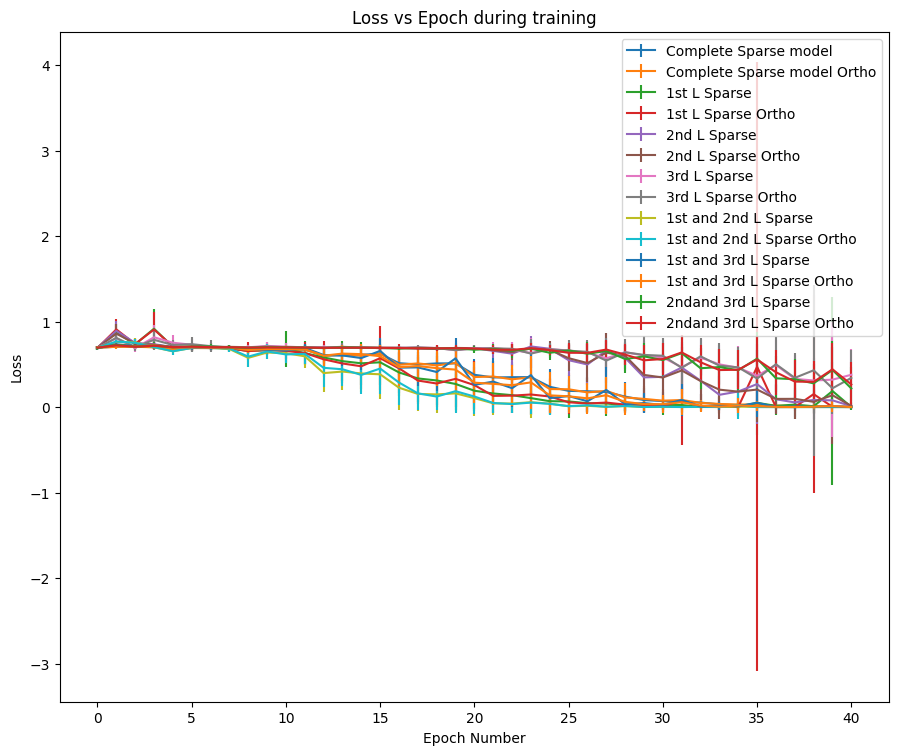

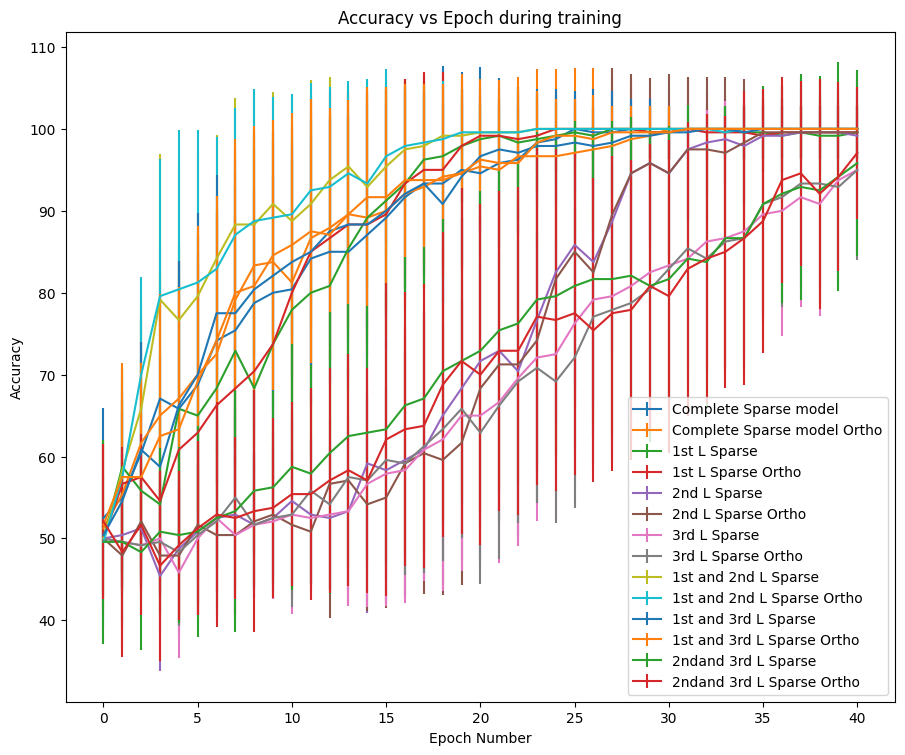

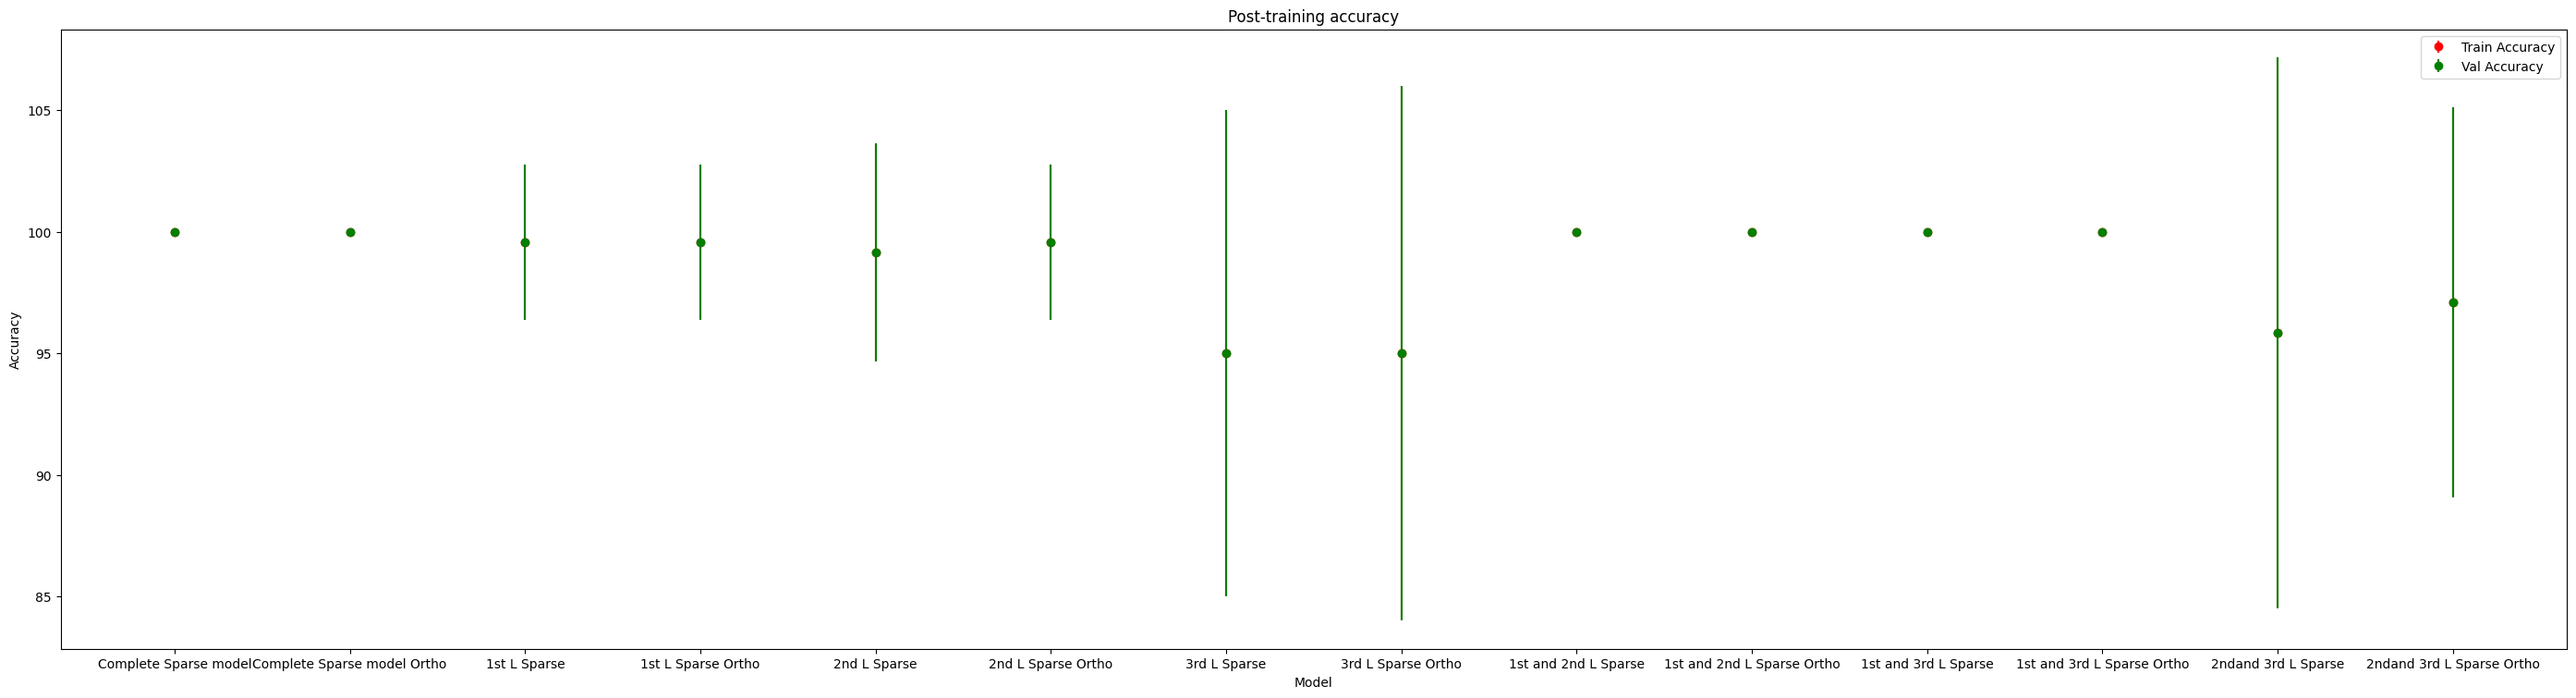

In [13]:
all_sparse_models = [ i  for i in combined_charts.get_models() if "Sparse" in i]
sparse_models = [ i  for i in combined_charts.get_models() if "Sparse" in i and "Ortho" not in i]
other_models = [ i  for i in combined_charts.get_models() if "Sparse" not in i]
combined_charts.plot_training_data_for(models = all_sparse_models).show()
combined_charts.plot_training_data_for(models = all_sparse_models, value_to_plot = TrainingCharts.ACC).show()
combined_charts.plot_test_accu_for_models(models = all_sparse_models, width_alpha=3).show()

/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_80725/441676240.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  combined_charts.plot_training_data_for(models = other_models).show()
/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_80725/441676240.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  combined_charts.plot_training_data_for(models = other_models, value_to_plot = TrainingCharts.ACC).show()
/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_80725/441676240.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  combined_charts.plot_test_accu_for_models(models = other_models, width_alpha=3).show()


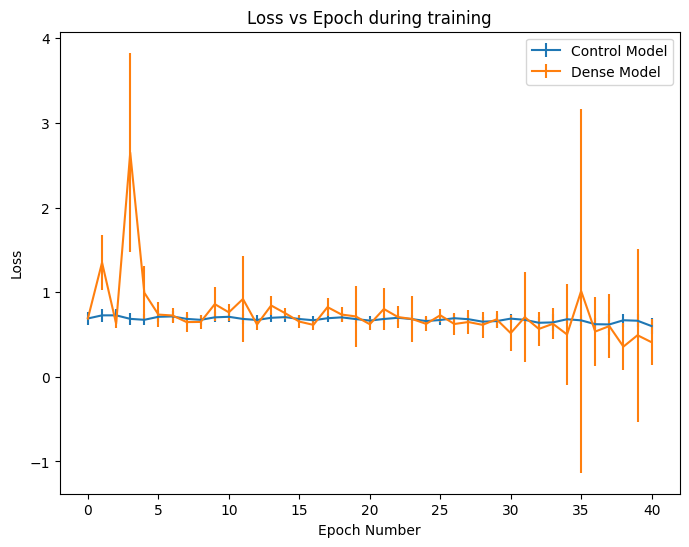

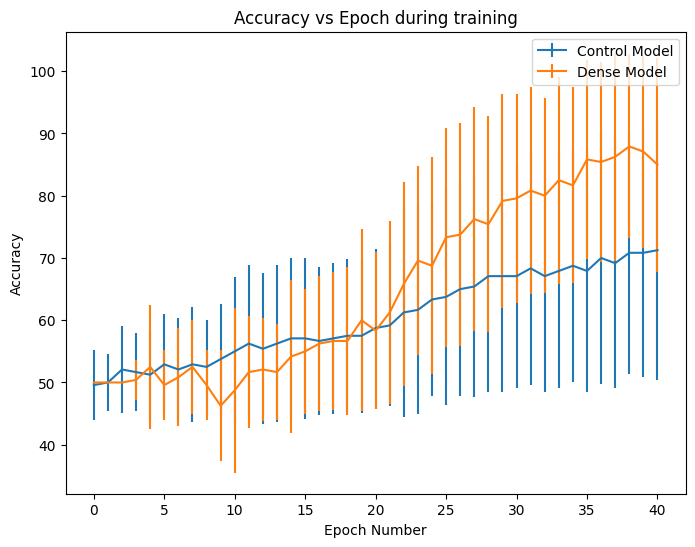

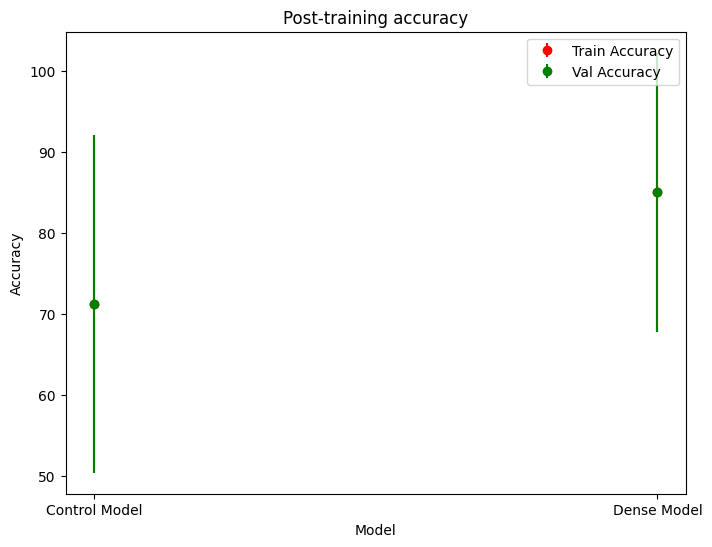

In [11]:
combined_charts.plot_training_data_for(models = other_models).show()
combined_charts.plot_training_data_for(models = other_models, value_to_plot = TrainingCharts.ACC).show()
combined_charts.plot_test_accu_for_models(models = other_models, width_alpha=3).show()

/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_80725/1745207701.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  combined_charts.plot_training_data_for(no_std= True).show()
/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_80725/1745207701.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  combined_charts.plot_training_data_for(value_to_plot = TrainingCharts.ACC, no_std= True).show()
/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_80725/1745207701.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  combined_charts.plot_test_accu_for_models(width_alpha=3, no_std= True).show()


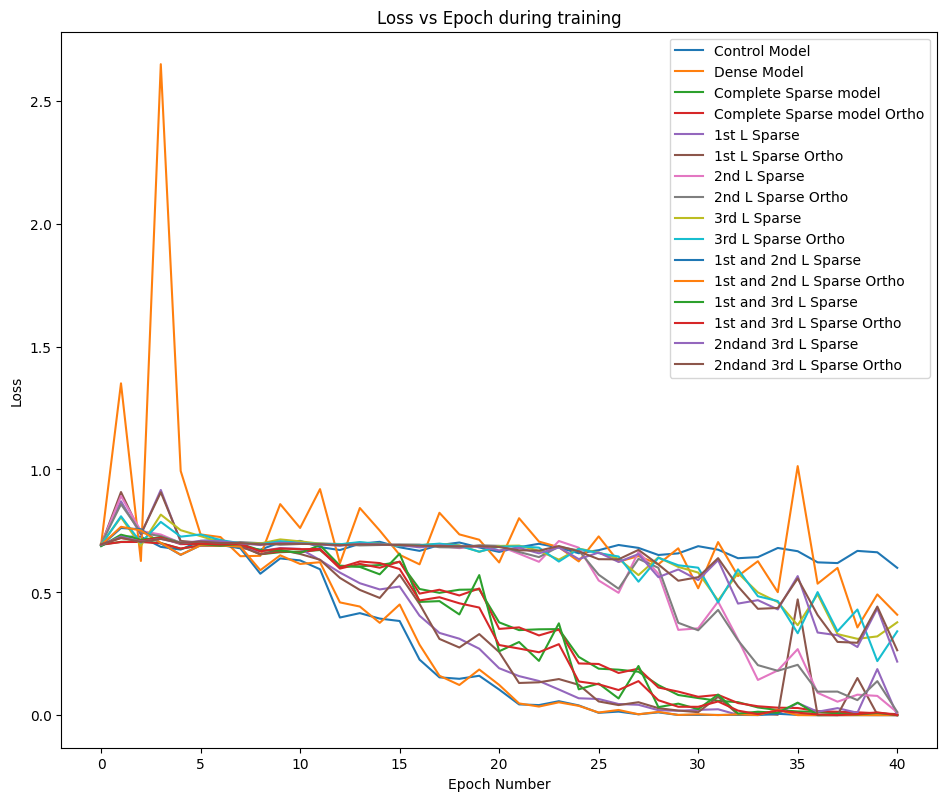

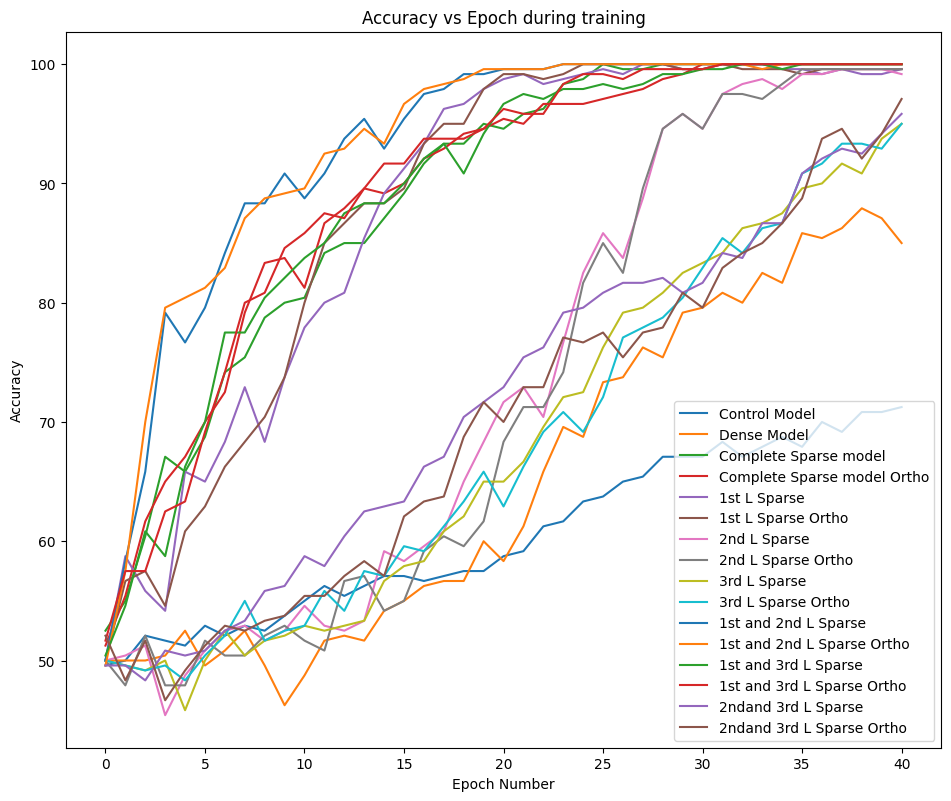

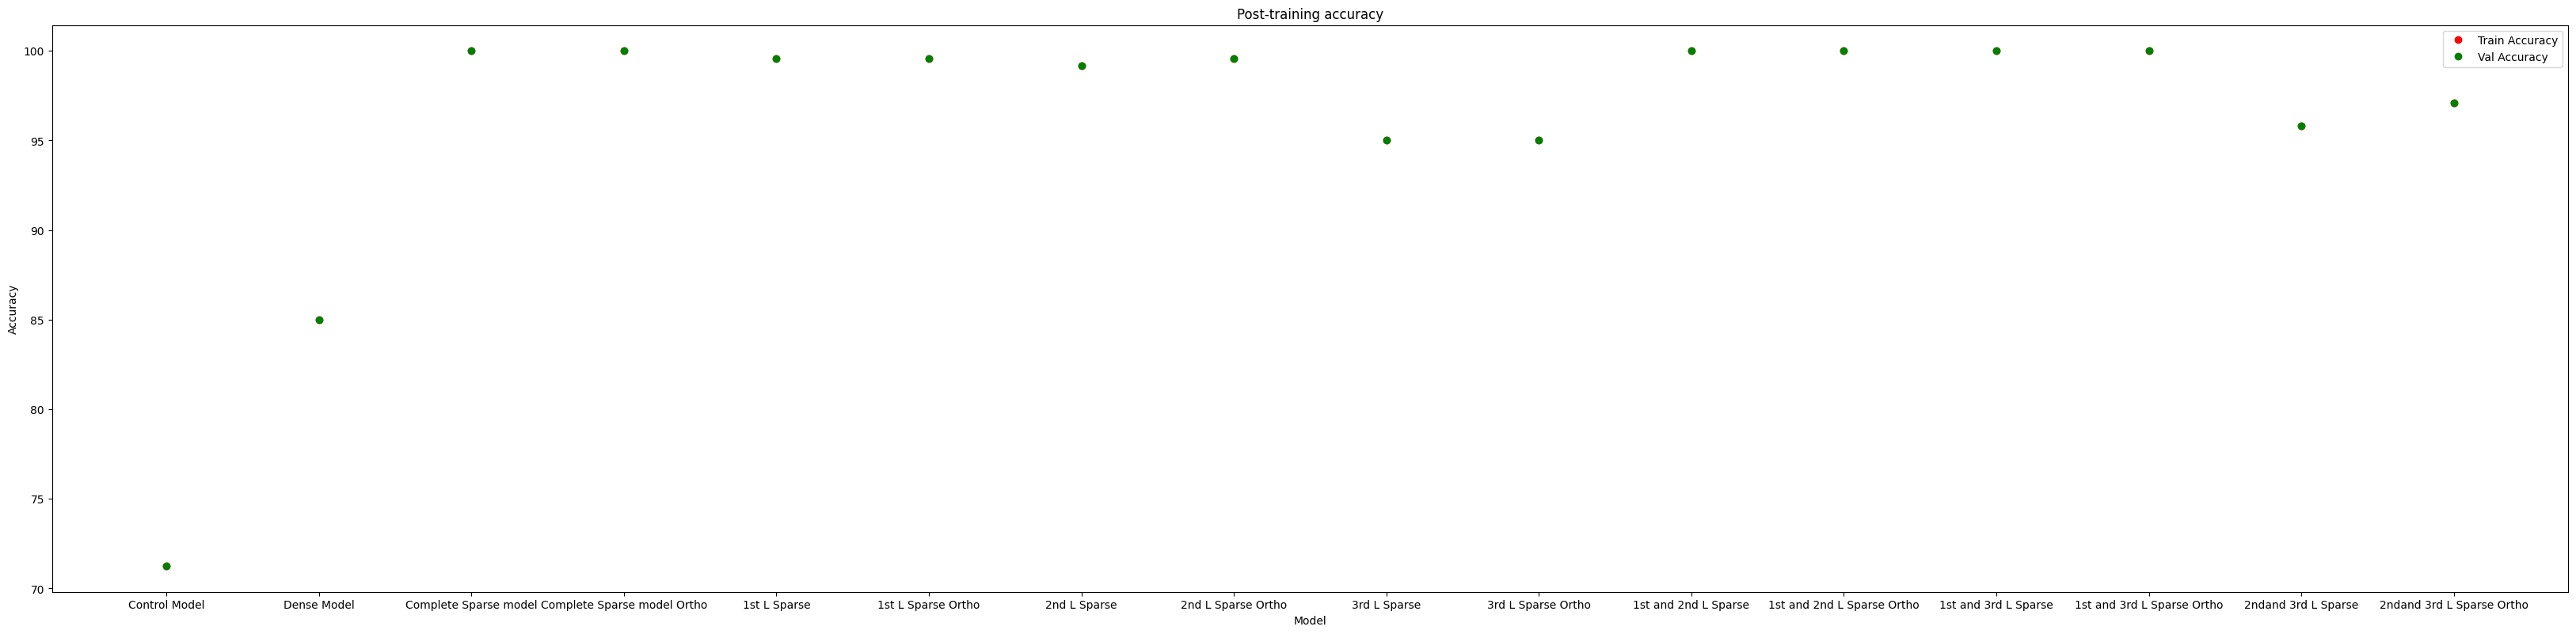

In [12]:
combined_charts.plot_training_data_for(no_std= True).show()
combined_charts.plot_training_data_for(value_to_plot = TrainingCharts.ACC, no_std= True).show()
combined_charts.plot_test_accu_for_models(width_alpha=3, no_std= True).show()